# PyProj

Information about PyProj can be found at [https://pyproj4.github.io/pyproj/stable/index.html](https://pyproj4.github.io/pyproj/stable/index.html).

Information about the actual Proj can be found at [https://proj.org/en/stable/index.html](https://proj.org/en/stable/index.html).



In [ ]:
# Import modules
from pyproj import CRS, Transformer, Geod
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# 2. Projections and CRS

In [5]:
# Define CRS for WGS84 and NAD83
wgs84 = CRS("EPSG:4326")  # WGS84
nad83 = CRS("EPSG:32198")  # NAD83

# Print the WKT representations
print("WGS84 WKT:")
pprint(wgs84.to_wkt())  # Print WKT for WGS84
print("\nNAD83 WKT:")
pprint(nad83.to_wkt())  # Print WKT for NAD83

# Print the CRS objects' type to verify it's a CRS instance
print("\nType of WGS84 CRS:")
print(type(wgs84))  # Should print: <class 'pyproj.crs.CRS'>

print("\nType of NAD83 CRS:")
print(type(nad83))  # Should print: <class 'pyproj.crs.CRS'>


WGS84 WKT:
('GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 '
 'ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World '
 'Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 '
 '(G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic '
 'System 1984 (G1674)"],MEMBER["World Geodetic System 1984 '
 '(G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],MEMBER["World '
 'Geodetic System 1984 (G2296)"],ELLIPSOID["WGS '
 '84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic '
 'latitude '
 '(Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic '
 'longitude '
 '(Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal '
 'component of 3D '
 'system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]')

NAD83 WKT:
('PROJCRS["NAD83 / Quebec Lambert",BASEGEOGCRS["NAD83"

In [ ]:
# A lot of information
print("Area of use for WGS84:")
print(wgs84.area_of_use)
#
print("\nArea of use for NAD83:")
print(nad83.area_of_use)

Area of use for WGS84:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)

Area of use for NAD83:
- name: Canada - Quebec.
- bounds: (-79.85, 44.99, -57.1, 62.62)


In [ ]:
# A lot of information
print("Is WGS84 projected?")
print(wgs84.is_projected)
#
print("\nIs NAD83 projected?")
print(nad83.is_projected)

Is WGS84 projected?
False

Is NAD83 projected?
True


In [11]:
#
print("\nAxis information for WGS84:")
print(wgs84.axis_info)
#
print("\nAxis information fo NAD83:")
print(nad83.axis_info)


Axis information for WGS84:
[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree), Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Axis information fo NAD83:
[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]


# Passing from one CRS to another

To switch from one CRS to another requires TRANSFORMERS

In [31]:
my_transformer = Transformer.from_crs(crs_from=wgs84, crs_to=nad83, always_xy=True)

#
print(my_transformer)
print(type(my_transformer))

proj=pipeline step proj=unitconvert xy_in=deg xy_out=rad step proj=lcc lat_0=44 lon_0=-68.5 lat_1=60 lat_2=46 x_0=0 y_0=0 ellps=GRS80
<class 'pyproj.transformer.Transformer'>


In [34]:
# Create tuples containing the coordinates of Montreal and Quebec
# Notice they are in the Lon-Lat format
montreal_wgs84 = (-73.5673, 45.5017)
quebec_wgs84 = (-71.2082, 46.8139)

print("Coordinates of Montreal in WGS84: ", montreal_wgs84)
print("Coordinates of Quebec in WGS84: ", quebec_wgs84)

Coordinates of Montreal in WGS84:  (-73.5673, 45.5017)
Coordinates of Quebec in WGS84:  (-71.2082, 46.8139)


In [35]:
# Use the .transform() method of my_transformer to get the coordinates
montreal_nad83 = my_transformer.transform(xx=montreal_wgs84[0], yy=montreal_wgs84[1])
quebec_nad83 = my_transformer.transform(xx=quebec_wgs84[0], yy=quebec_wgs84[1])

#
print("Coordinates of Montreal in NAD83: ", montreal_nad83)
print("Coordinates of Quebec in NAD83: ", quebec_nad83)

Coordinates of Montreal in NAD83:  (-396122.43209208664, 181374.14914630336)
Coordinates of Quebec in NAD83:  (-206315.6389128428, 317060.9367326632)


# Calculating geodetic distances

Pyproj allows for the calculation of geodetic distances

In [37]:
# Initialize Geod for WGS84
geod_wgs84 = Geod(ellps="WGS84")

#
print(geod_wgs84)
print(type(geod_wgs84))

Geod(ellps='WGS84')
<class 'pyproj.geod.Geod'>


In [39]:
# Coordinates of two points: Montreal and Paris
# We had Montreal already
montreal_wgs84 = (-73.5673, 45.5017)
paris_wgs84 = (2.3522, 48.8566)

In [40]:
# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
azimuth1_wgs84, azimuth2_wgs84, distance_wgs84 = geod_wgs84.inv(lons1=montreal_wgs84[0],
                                                                lats1=montreal_wgs84[1],
                                                                lons2=paris_wgs84[0],
                                                                lats2=paris_wgs84[1])

In [45]:
# WGS84 distance (in km)
print(f"Distance (WGS84): {distance_wgs84 / 1000:.2f} km")

Distance (WGS84): 5521.12 km


In [46]:
# Spherical model
geod_sphere = Geod(ellps="sphere")

# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
azimuth1_sphere, azimuth2_sphere, distance_sphere = geod_sphere.inv(lons1=montreal_wgs84[0],
                                                                    lats1=montreal_wgs84[1],
                                                                    lons2=paris_wgs84[0],
                                                                    lats2=paris_wgs84[1])

# Spherical distance in km:
print(f"Distance (Spherical): {distance_sphere / 1000:.2f} km")

Distance (Spherical): 5505.14 km


# Biological application


In [36]:
# Calculating
# Load the 
df_104 = pd.read_csv("../data/KOR0104-43589.csv")
df_104.head()


,event-id,visible,timestamp,location-long,location-lat,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,29823005834,True,2018-10-04 12:00:00.000,127.80097,34.598628,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
1,29823005835,True,2018-10-07 23:41:00.000,127.40653,34.415340,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
2,29823005836,True,2018-10-08 06:51:00.000,127.32227,34.309520,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
3,29823005837,True,2018-10-11 06:15:00.000,126.95259,34.171100,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
4,29823005838,True,2018-10-12 22:06:00.000,126.60508,34.095530,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...


In [52]:
# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
azimuth1s_wgs84, azimuths2_wgs84, distances_wgs84 = geod_wgs84.inv(lons1=df_104.iloc[:-1]["location-long"],
                                                                lats1=df_104.iloc[:-1]["location-lat"],
                                                                lons2=df_104.iloc[1:]["location-long"],
                                                                lats2=df_104.iloc[1:]["location-lat"])

In [54]:
print(distances_wgs84)

[ 41538.67112944  14066.70994608  37357.61285519  33132.32149367
  46316.26519064  22593.02356907  26413.29882993  65764.67972911
  50864.22917364  64266.4072772   61882.251694    53305.46122828
  43526.8272042   41597.50673238  25256.07271825  36286.91876996
  36453.86646745  44234.78944285  57877.78916697  32564.20427765
  31370.46706306  27417.34582176  47821.61035017  22754.38178625
  22653.18719468  51857.7303886   47969.79167369  57303.91959476
  63257.13391324  20772.46418122  28092.55197833  70329.25972077
  26964.72128164  46227.75747193  36650.84415983   1399.61671394
  53413.77699217  31973.66957049  40319.29398697  46465.20112082
  46357.86079467  53040.63554385  53414.22342607  40571.82516774
  30357.88877002  96015.2800248   74986.11732721  58236.32897227
  58360.21561491  46802.59797895  48629.74582793  23690.96853913
  13448.79379847   6449.40526502   1221.85144863  22235.33685271
 103122.40111871  35341.0808887   73771.42688469  37532.05245775
  57973.25531216  31935.9

In [91]:
print("Total distance traveled by KOR-104:", sum(distances_wgs84) / 1000, "km")

Total distance traveled by KOR-104: 5203.50562082636 km


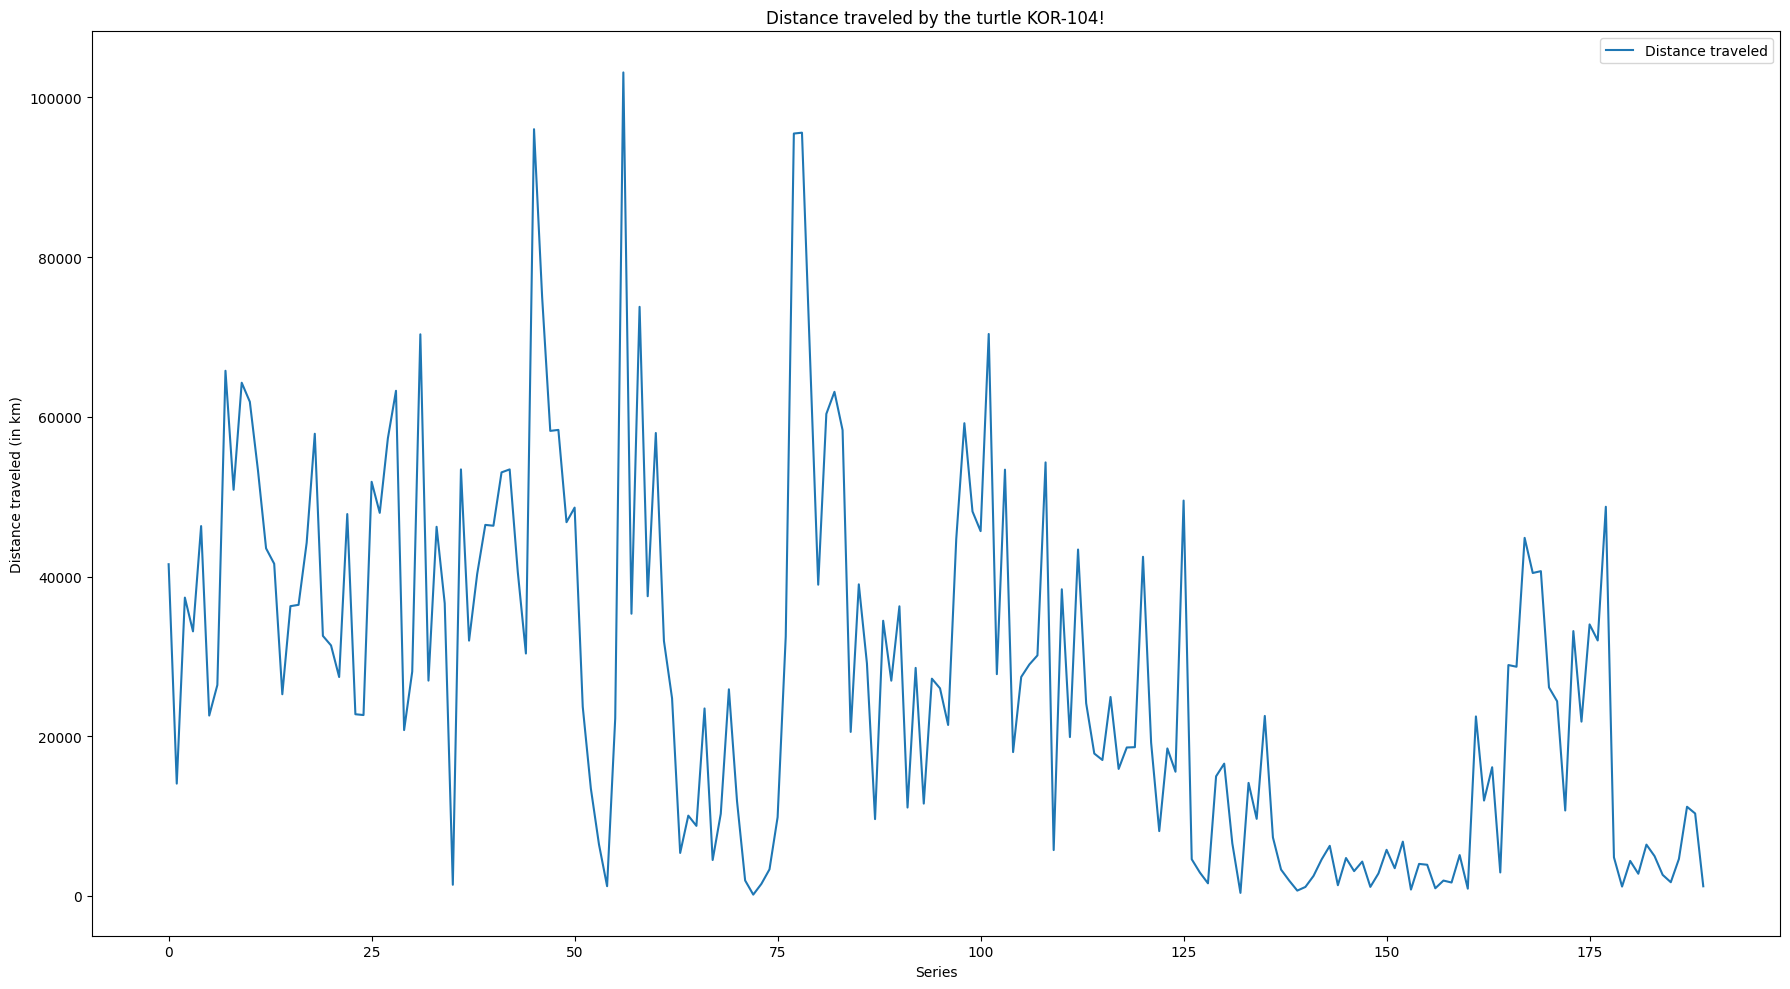

In [ ]:

# Assuming distances_wgs84 is defined somewhere else in your code
# If not, replace it with your data, for example:
# distances_wgs84 = [5.0, 10.0, 15.0, 20.0, 25.0]

# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax.set_aspect(aspect="auto", adjustable="box")

# Scatter plot for original data points (assuming distances_wgs84 is defined)
ax.plot(distances_wgs84)

# Add axis labels and title
ax.set_xlabel("Series")
ax.set_ylabel("Distance traveled (in km)")
ax.set_title("Distance traveled by the turtle KOR-104!")

# Add legend
ax.legend()

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


# BONUS ROUND

In [70]:
# Have a look at the "timestamp" column
print(df_104["timestamp"].head())
print(df_104["timestamp"].dtype)

0    2018-10-04 12:00:00.000
1    2018-10-07 23:41:00.000
2    2018-10-08 06:51:00.000
3    2018-10-11 06:15:00.000
4    2018-10-12 22:06:00.000
Name: timestamp, dtype: object
object


In [ ]:
# Use Pandas particular datetime format
print(pd.to_datetime(df_104["timestamp"]).head())
print(pd.to_datetime(df_104["timestamp"]).dtype)

0   2018-10-04 12:00:00
1   2018-10-07 23:41:00
2   2018-10-08 06:51:00
3   2018-10-11 06:15:00
4   2018-10-12 22:06:00
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [73]:
# Use it to replace the "timestamp" variable
df_104["timestamp"] = pd.to_datetime(df_104["timestamp"])

C:\Users\elami\AppData\Local\Temp\ipykernel_20328\2003285954.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


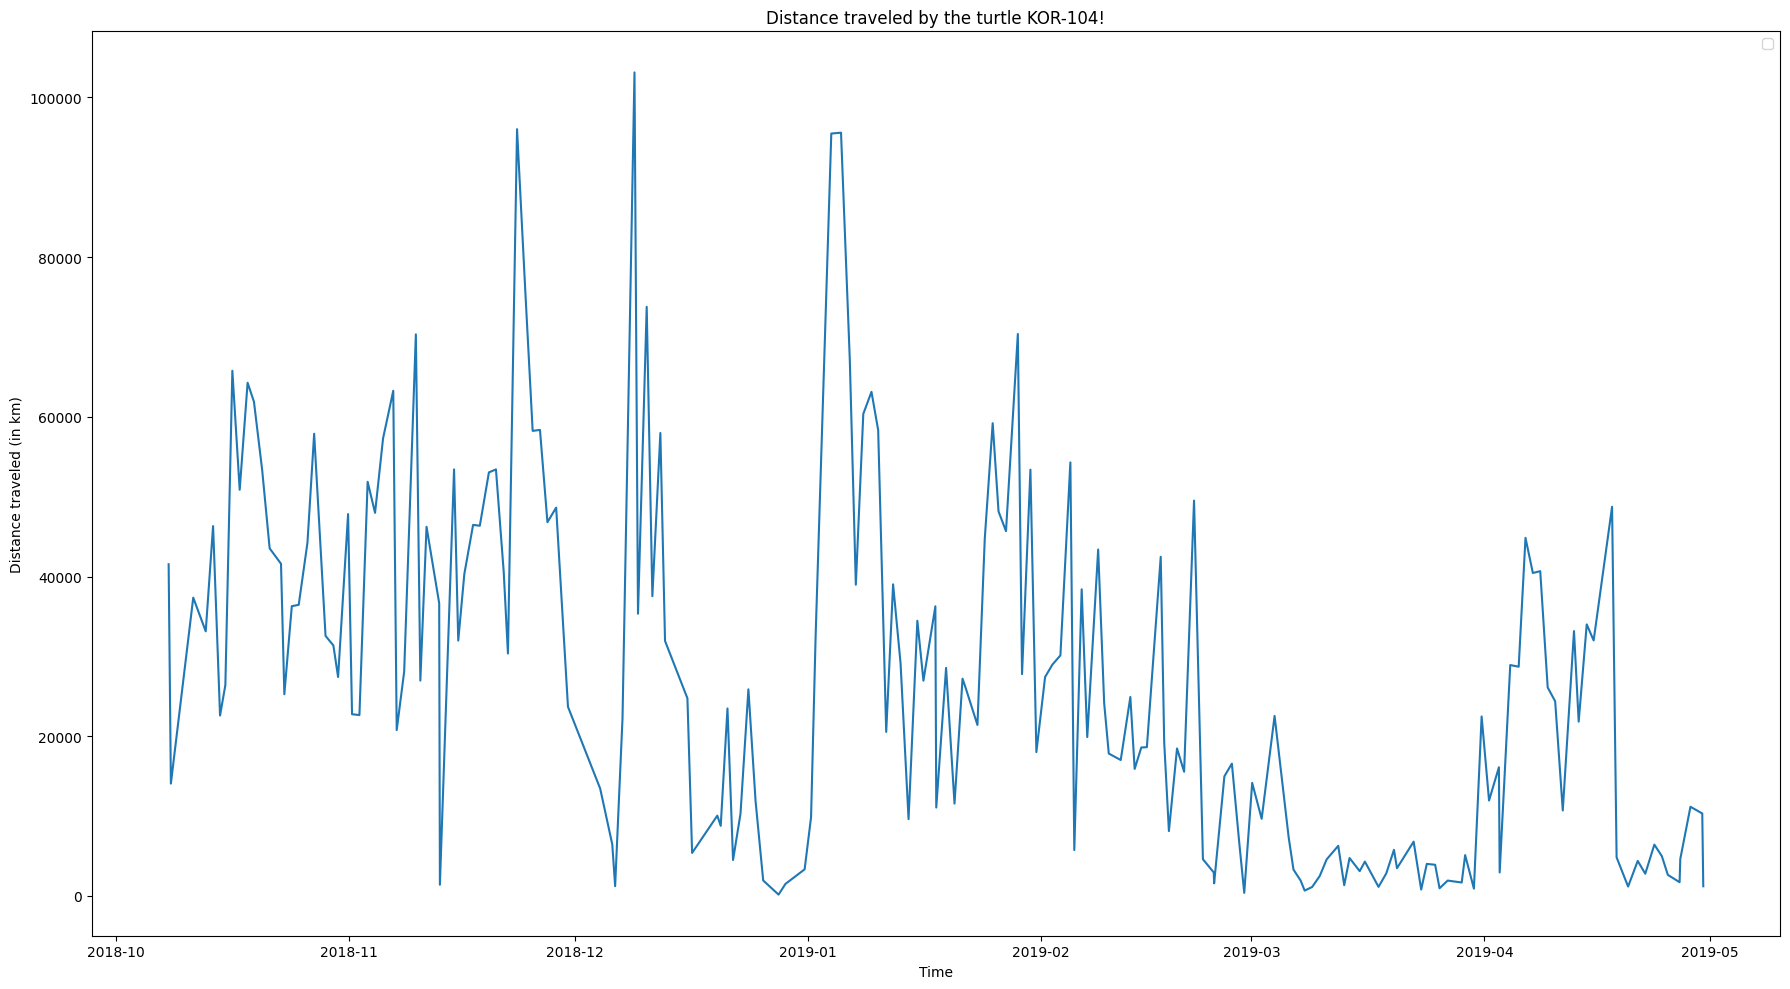

In [92]:
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax.set_aspect(aspect="auto", adjustable="box")

# Scatter plot for original data points (assuming distances_wgs84 is defined)
ax.plot(df_104["timestamp"][1:], distances_wgs84)

# Add axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Distance traveled (in km)")
ax.set_title("Distance traveled by the turtle KOR-104!")

# Add legend
ax.legend()

# Adjust layout and show the plot
fig.tight_layout()
plt.show()
